# SECTION 1: DECLARE THE MODULES

In [2]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [3]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

100% [..................................................................................] 500 / 500

In [4]:
DataSet

'training_attack_types (4).txt'

In [5]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [6]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [7]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [8]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [9]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

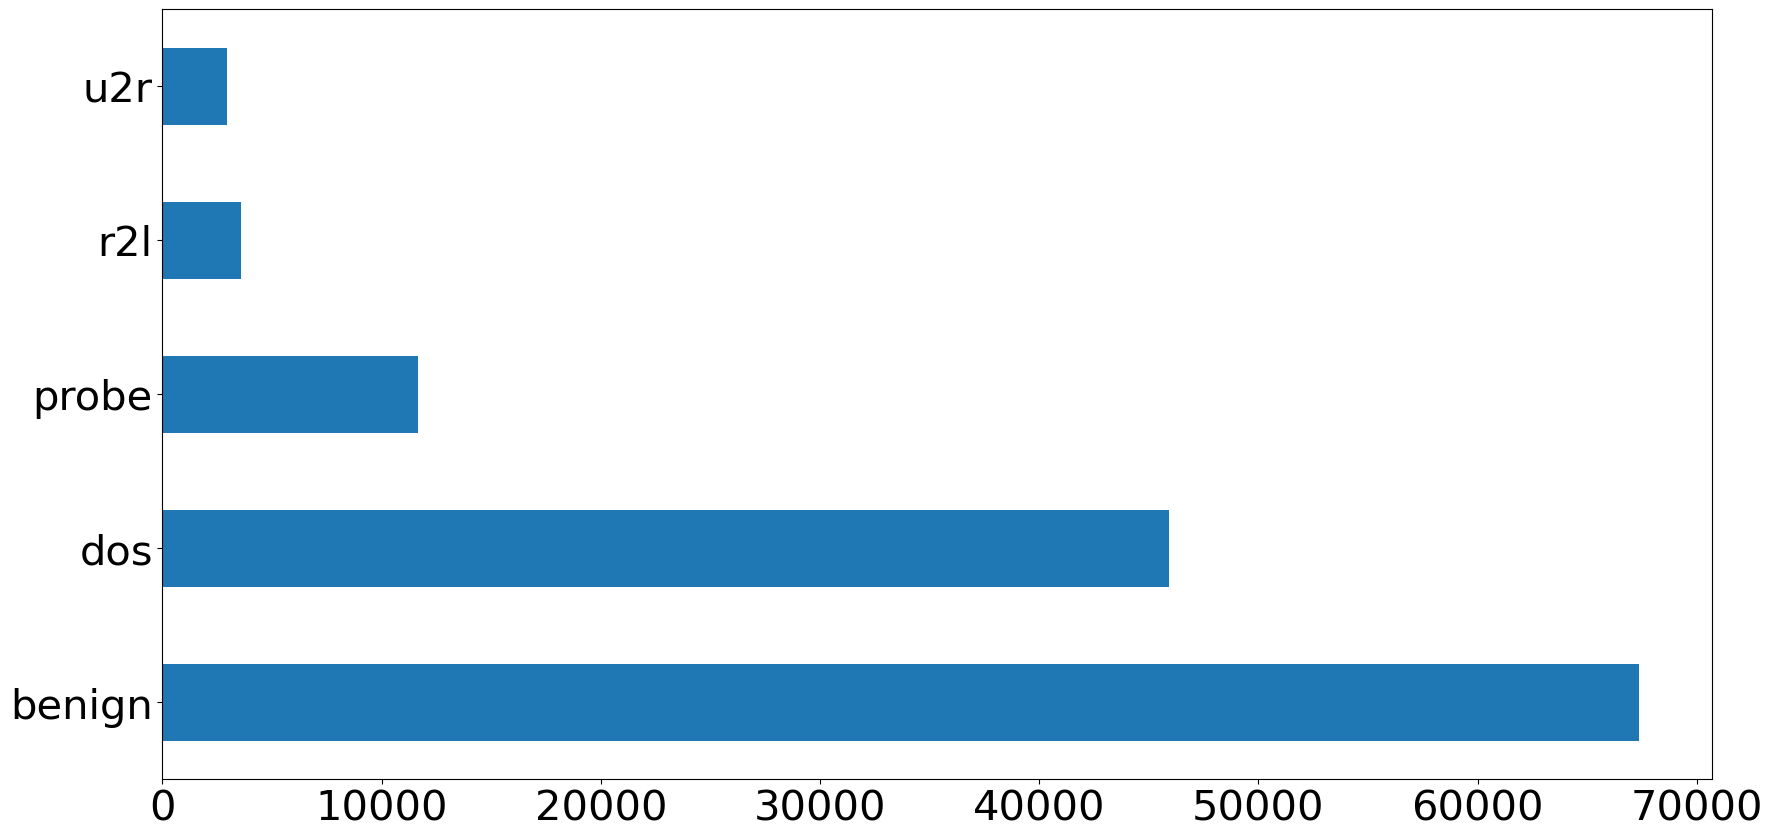

In [10]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [11]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print("Accuracy of Decison Tree Classifier is ", classifier.score(test_x,test_Y))

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719
Accuracy of Decison Tree Classifier is  0.7621096522356281


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_Y, pred_y))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.79      0.86      7636
       probe       0.79      0.63      0.70      2423
         r2l       0.98      0.11      0.19      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.84      0.51      0.54     22544
weighted avg       0.81      0.76      0.73     22544

FPR is: 0.03506574827802129


Text(0.5, 427.9555555555555, 'Predicted label')

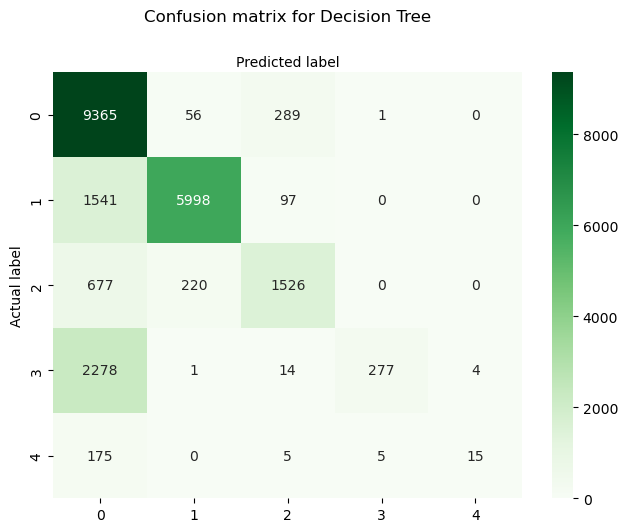

In [12]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(train_x, train_Y)

pred_y = rfc.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print("Accuracy of Random Forest is",rfc.score(test_x,test_Y))

[[9534  175    2    0    0]
 [2740 4896    0    0    0]
 [ 801 1615    7    0    0]
 [2572    1    1    0    0]
 [  91  109    0    0    0]]
0.3596078779276083
Accuracy of Random Forest is 0.6403921220723917


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_Y, pred_y))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

      benign       0.61      0.98      0.75      9711
         dos       0.72      0.64      0.68      7636
       probe       0.70      0.00      0.01      2423
         r2l       0.00      0.00      0.00      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.64     22544
   macro avg       0.41      0.33      0.29     22544
weighted avg       0.58      0.64      0.55     22544

FPR is: 0.060034305317324184


Text(0.5, 427.9555555555555, 'Predicted label')

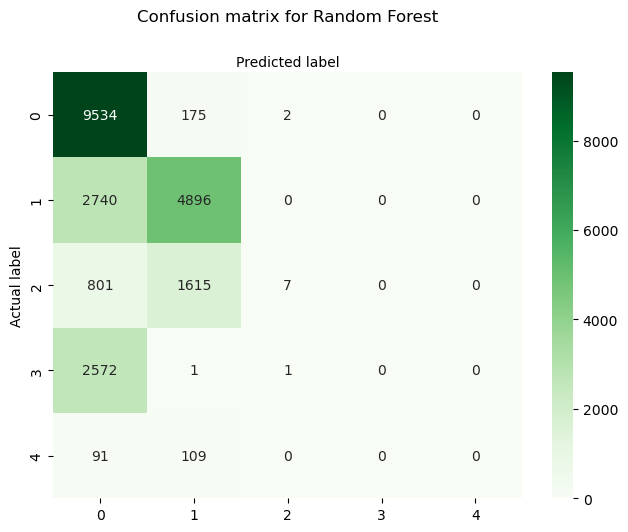

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, zero_one_loss

gn =  GaussianNB()
gn.fit(train_x, train_Y)

pred_y = gn.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print("Accuracy of Gaussian Naive Bayes is ",gn.score(test_x,test_Y))

[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
0.5053672817601136
Accuracy of Gaussian Naive Bayes is  0.49463271823988647


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_Y, pred_y))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

      benign       0.53      0.70      0.60      9711
         dos       0.89      0.41      0.56      7636
       probe       0.92      0.10      0.18      2423
         r2l       0.19      0.36      0.25      2574
         u2r       0.06      0.32      0.10       200

    accuracy                           0.49     22544
   macro avg       0.52      0.38      0.34     22544
weighted avg       0.65      0.49      0.50     22544

FPR is: 0.017908723281340265


Text(0.5, 427.9555555555555, 'Predicted label')

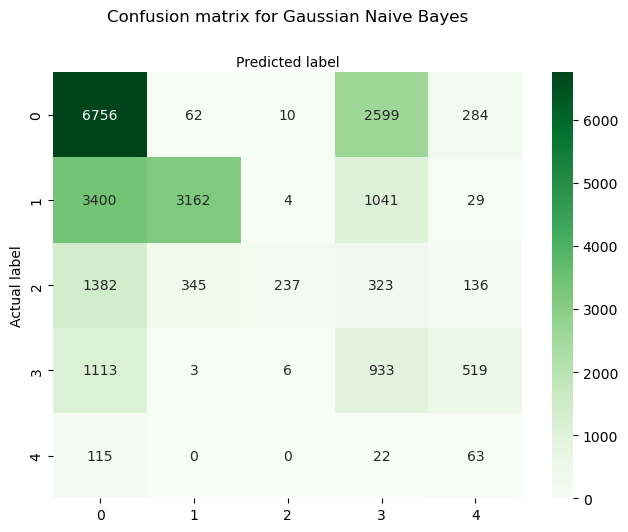

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Gaussian Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

abc =   AdaBoostClassifier(n_estimators=20, random_state=0)
abc.fit(train_x, train_Y)

pred_y = abc.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print("Accuracy of AdaBoost Classifier is ",abc.score(test_x,test_Y))

[[8841  607  263    0    0]
 [1613 4479 1544    0    0]
 [ 414  306 1703    0    0]
 [2362    2  210    0    0]
 [ 175    0   25    0    0]]
0.33361426543647976
Accuracy of AdaBoost Classifier is  0.6663857345635202


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_Y, pred_y))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

      benign       0.66      0.91      0.76      9711
         dos       0.83      0.59      0.69      7636
       probe       0.45      0.70      0.55      2423
         r2l       0.00      0.00      0.00      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.67     22544
   macro avg       0.39      0.44      0.40     22544
weighted avg       0.61      0.67      0.62     22544

FPR is: 0.2734234234234234


Text(0.5, 427.9555555555555, 'Predicted label')

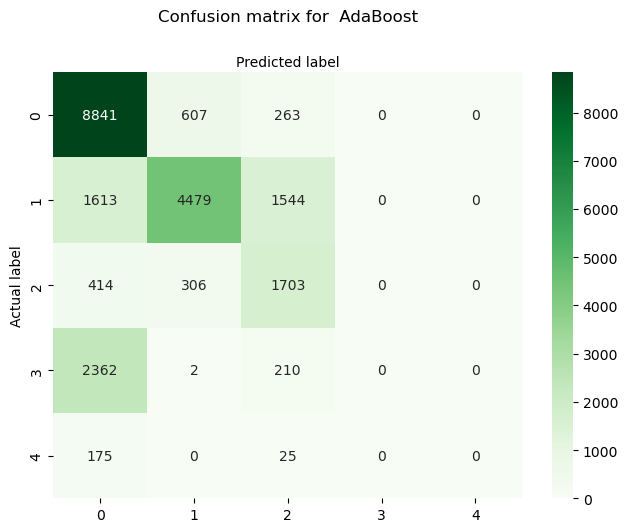

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for  AdaBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

mlp =   MLPClassifier(alpha=1, max_iter=20)
mlp.fit(train_x, train_Y)

pred_y = mlp.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print("Accuracy of MLP is ",mlp.score(test_x,test_Y))


[[9043  467  199    2    0]
 [1823 5766   47    0    0]
 [ 457  183 1783    0    0]
 [2526    5   19   24    0]
 [ 188    2    0   10    0]]
0.2629524485450674
Accuracy of MLP is  0.7370475514549326


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_Y, pred_y))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

      benign       0.64      0.93      0.76      9711
         dos       0.90      0.76      0.82      7636
       probe       0.87      0.74      0.80      2423
         r2l       0.67      0.01      0.02      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.74     22544
   macro avg       0.62      0.49      0.48     22544
weighted avg       0.75      0.74      0.69     22544

FPR is: 0.2039301310043668


Text(0.5, 427.9555555555555, 'Predicted label')

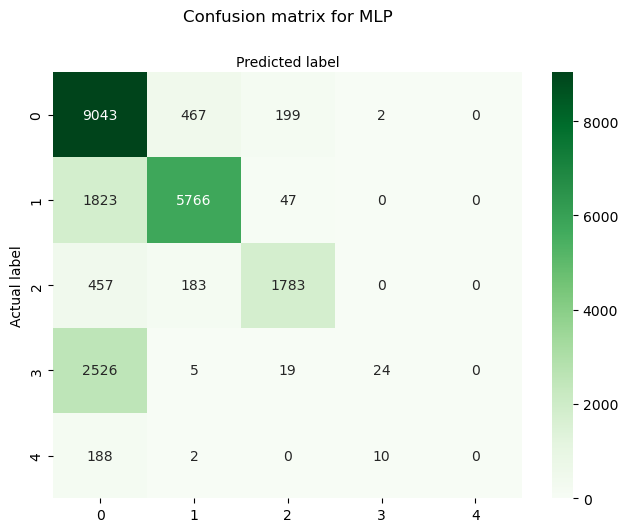

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x, train_Y)

pred_y = knn.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
print("Accuracy of KNN is",knn.score(test_x,test_Y))

[[9455   54  201    1    0]
 [1664 5904   68    0    0]
 [ 789  179 1455    0    0]
 [2428    2   32  111    1]
 [ 170    0   15    7    8]]
0.2488910574875799
Accuracy of KNN is 0.7511089425124201


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_Y, pred_y))
TP = results[0,0]
FP =  results[0,1]
TN =  results[1,0]
FN = results[1,1]
FPR = FP/(FP+TN)
print("FPR is:",FPR)

              precision    recall  f1-score   support

      benign       0.65      0.97      0.78      9711
         dos       0.96      0.77      0.86      7636
       probe       0.82      0.60      0.69      2423
         r2l       0.93      0.04      0.08      2574
         u2r       0.89      0.04      0.08       200

    accuracy                           0.75     22544
   macro avg       0.85      0.49      0.50     22544
weighted avg       0.81      0.75      0.71     22544

FPR is: 0.03143189755529686


Text(0.5, 427.9555555555555, 'Predicted label')

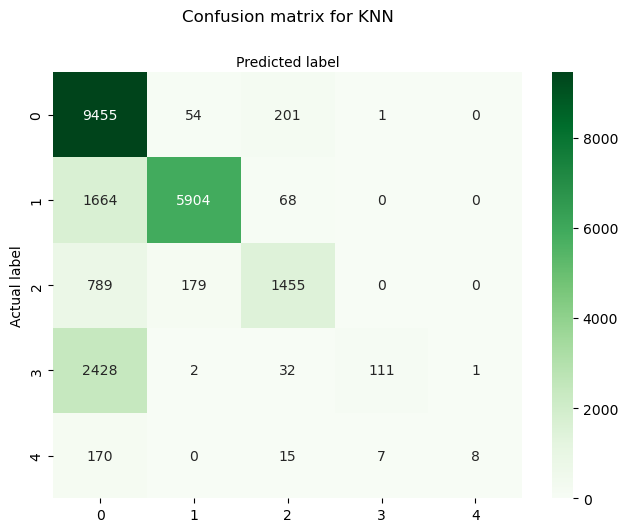

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

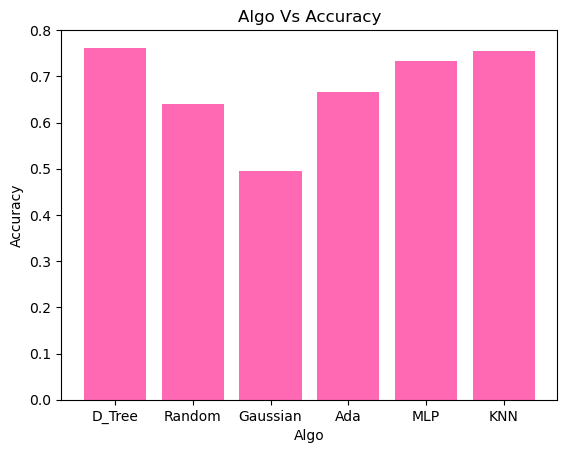

In [65]:
import matplotlib.pyplot as plt
   
Algo = ['D_Tree','Random','Gaussian','Ada', 'MLP', 'KNN']

Accuracy = [0.7621096522356281,0.6403921220723917,0.49463271823988647,0.6663857345635202,0.7343417317246274,0.7551898509581263,]
plt.bar(Algo, Accuracy,color='hotpink')
plt.title('Algo Vs Accuracy')
plt.xlabel('Algo')
plt.ylabel('Accuracy')
plt.show()